<a href="https://colab.research.google.com/github/biancafsena/biancafsena/blob/main/Classifica%C3%A7%C3%A3o_de_Credit_Score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**RM348231 - Bianca Firmino Ferreira de Sena - 3DTSR**






# **1-	Criar um modelo de classificação e aplicar na base e colher e explicar os resultados.**

### **Bibliotecas**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

Com objetivo de importar varias bibliotecas com modulos de dados.

### **Listas de Modelos**

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'Random Forest Classifier': RandomForestClassifier()
}

O objetivo desse código é criar um dicionário chamado models que associa nomes de algoritmos de aprendizado.

### **Carregar os dados**

In [ ]:
data = pd.read_csv("train.csv")
print(data.head(10))

       ID Customer_ID     Month             Name   Age          SSN  \
0  0x1602   CUS_0xd40   January    Aaron Maashoh    23  821-00-0265   
1  0x1603   CUS_0xd40  February    Aaron Maashoh    23  821-00-0265   
2  0x1604   CUS_0xd40     March    Aaron Maashoh  -500  821-00-0265   
3  0x1605   CUS_0xd40     April    Aaron Maashoh    23  821-00-0265   
4  0x1606   CUS_0xd40       May    Aaron Maashoh    23  821-00-0265   
5  0x1607   CUS_0xd40      June    Aaron Maashoh    23  821-00-0265   
6  0x1608   CUS_0xd40      July    Aaron Maashoh    23  821-00-0265   
7  0x1609   CUS_0xd40    August              NaN    23    #F%$D@*&8   
8  0x160e  CUS_0x21b1   January  Rick Rothackerj   28_  004-07-5839   
9  0x160f  CUS_0x21b1  February  Rick Rothackerj    28  004-07-5839   

  Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0  Scientist      19114.12            1824.843333                  3  ...   
1  Scientist      19114.12                    NaN               

Possui o objetivo de carregar os dados do arquivo CSV "train.csv", usando a biblioteca Pandas.

### **Colunas**

In [ ]:
print(data.columns)

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')


Exibir os nomes das colunas apresentadas na base.

### **Separar as colunas categóricas e numéricas**

In [ ]:
categorical_columns = ['Month', 'Name', 'SSN', 'Occupation', 'Type_pf_Loan', 'Payment_Behaviour']  # Lista das colunas categóricas
numeric_columns = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Payment_of_min_Amount', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance', 'Credit_Score']  # Lista das colunas numéricas


Objetivo de criar lista separada e possui cateorias distintas: Colunas Categóricas e Colunas Númericas.

### **Remover a coluna 'ID' dos dados**

In [ ]:
data.drop("ID", axis=1, inplace=True)

Remover a coluna chamada "ID" do DataFrame data.

### **Linhas removidas com valores ausentes**

In [ ]:
data.dropna(inplace=True)

Possui o objetivo de remover todas as linhas do DataFrame data que contenham pelo menos um valor ausente (NaN).

### **Separar features e target**

In [ ]:
X = data.drop("Credit_Score", axis=1)
y = data["Credit_Score"]

Objetivo de separar o conjunto de dados em duas estruturas: Entrada e Saida, para treinar e avaliar modelos de previsão.

### **Garantir que todas as colunas sejam numéricas**

In [ ]:
X = X.apply(pd.to_numeric, errors='coerce')

Converter todas as colunas em númericas.

### **Converter colunas categóricas usando one-hot encoding**

In [ ]:
X = pd.get_dummies(X, columns=X.select_dtypes(include=['object']).columns)

### **Dividir em conjuntos de treinamento e teste**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 Realizar a codificação one-hot para as colunas do DataFrame X que contêm tipos de dados "object" como colunas categóricas.

### **Imputação para preencher valores ausentes (NaN)**

In [ ]:
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

Tratamento de valores ausentes nas variáveis do conjunto de dados, preenchendo-os com a média dos valores não ausentes.

### **Pré-processamento: Padronizar as features numéricas e codificar as categóricas**

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


Possui o objetivo de padronização dos dados nas colunas de recursos, para execução de conjunto no treinamento e teste.

### **Imputação de Valores Ausentes**

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


Objetivo de realizar a imputação de valores ausentes no treinamento(X_train) e teste (X_test) utilizando a estratégia da média (mean) para preencher os valores ausentes.

### **Modelo de Regressão Logística e aplicar na base**

Decision Tree Classifier Accuracy: 0.6644798500468604
              precision    recall  f1-score   support

        Good       0.59      0.57      0.58       207
        Poor       0.63      0.69      0.66       303
    Standard       0.71      0.68      0.70       557

    accuracy                           0.66      1067
   macro avg       0.65      0.65      0.65      1067
weighted avg       0.67      0.66      0.66      1067



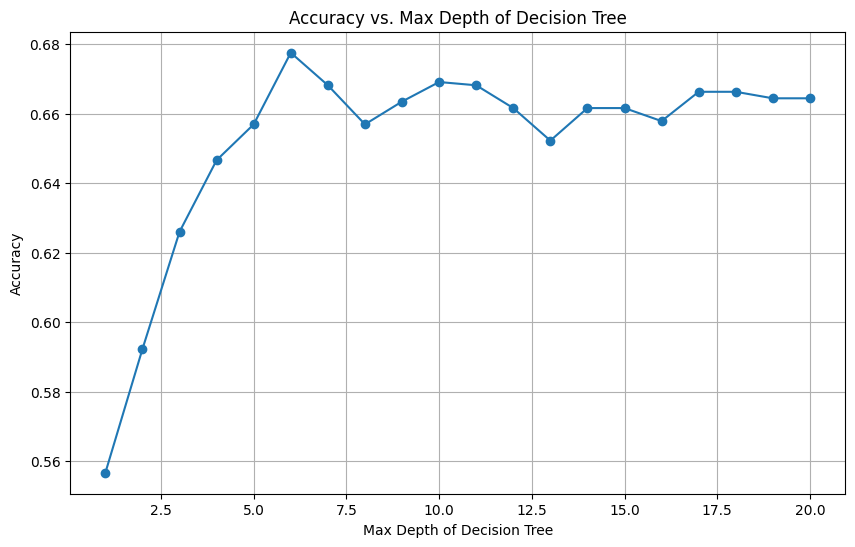

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

accuracies = []


hyperparameter_values = range(1, 21)

for depth in hyperparameter_values:
    dt_classifier = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_classifier.fit(X_train, y_train)
    dt_predictions = dt_classifier.predict(X_test)
    dt_accuracy = accuracy_score(y_test, dt_predictions)

    accuracies.append(dt_accuracy)

print("Decision Tree Classifier Accuracy:", dt_accuracy)
print(classification_report(y_test, dt_predictions))

# Gráfico de evolução da precisão
plt.figure(figsize=(10, 6))
plt.plot(hyperparameter_values, accuracies, marker='o', linestyle='-')
plt.xlabel('Max Depth of Decision Tree')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Max Depth of Decision Tree')
plt.grid(True)
plt.show()



Possui o objetivo de avaliar como a precisão (acurácia) de um classificador de Árvore de Decisão (Decision Tree Classifier) se comporta à medida que um hiperparâmetro específico, a profundidade máxima da árvore, é ajustado em um intervalo específico. Esse procedimento visa entender como o desempenho do modelo varia em relação à complexidade da árvore de decisão, permitindo identificar a profundidade ideal da árvore para o problema em questão.

### **Regressão Logistica**

Logistic Regression Accuracy: 0.569821930646673
              precision    recall  f1-score   support

        Good       0.44      0.19      0.27       207
        Poor       0.61      0.48      0.54       303
    Standard       0.57      0.76      0.65       557

    accuracy                           0.57      1067
   macro avg       0.54      0.48      0.49      1067
weighted avg       0.56      0.57      0.55      1067



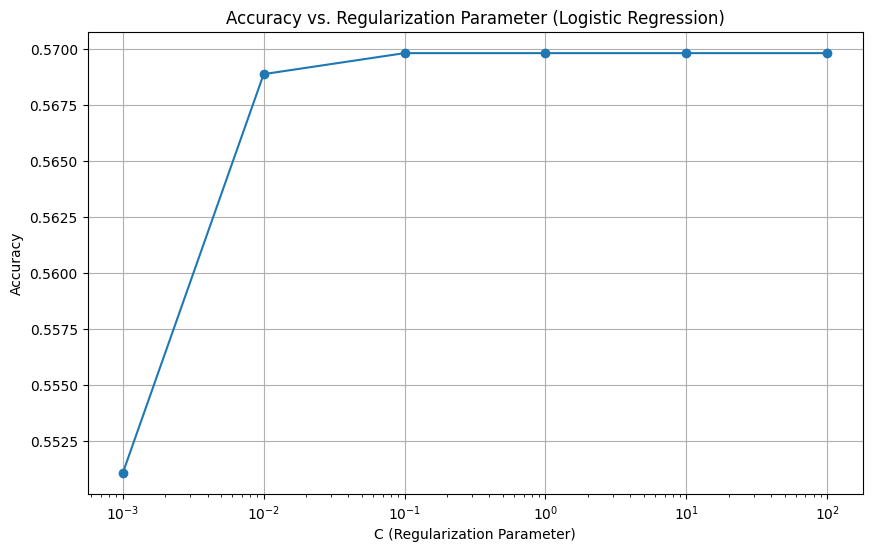

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

accuracies = []

C_values = [0.001, 0.01, 0.1, 1, 10, 100]

for C in C_values:
    lr_classifier = LogisticRegression(C=C, random_state=42)
    lr_classifier.fit(X_train, y_train)
    lr_predictions = lr_classifier.predict(X_test)
    lr_accuracy = accuracy_score(y_test, lr_predictions)

    accuracies.append(lr_accuracy)

print("Logistic Regression Accuracy:", lr_accuracy)
print(classification_report(y_test, lr_predictions))

# Gráfico de evolução da precisão
plt.figure(figsize=(10, 6))
plt.semilogx(C_values, accuracies, marker='o', linestyle='-')
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Regularization Parameter (Logistic Regression)')
plt.grid(True)
plt.show()



Possui o objetivo de analisar como a precisão de um classificador de **Regressão Logística** varia com diferentes níveis de regularização, representados pelo hiperparâmetro C. Isso ajuda a entender como a complexidade do modelo é afetada pela regularização.

### **Naive Bayes**


Naive Bayes Accuracy: 0.556550424128181
              precision    recall  f1-score   support

        Good       0.36      0.49      0.42      1736
        Poor       0.59      0.64      0.61      3351
    Standard       0.63      0.53      0.57      5523

    accuracy                           0.56     10610
   macro avg       0.53      0.55      0.54     10610
weighted avg       0.57      0.56      0.56     10610

Naive Bayes Accuracy: 0.556550424128181
              precision    recall  f1-score   support

        Good       0.36      0.49      0.42      1736
        Poor       0.59      0.64      0.61      3351
    Standard       0.63      0.53      0.57      5523

    accuracy                           0.56     10610
   macro avg       0.53      0.55      0.54     10610
weighted avg       0.57      0.56      0.56     10610

Naive Bayes Accuracy: 0.556550424128181
              precision    recall  f1-score   support

        Good       0.36      0.49      0.42      1736
        P

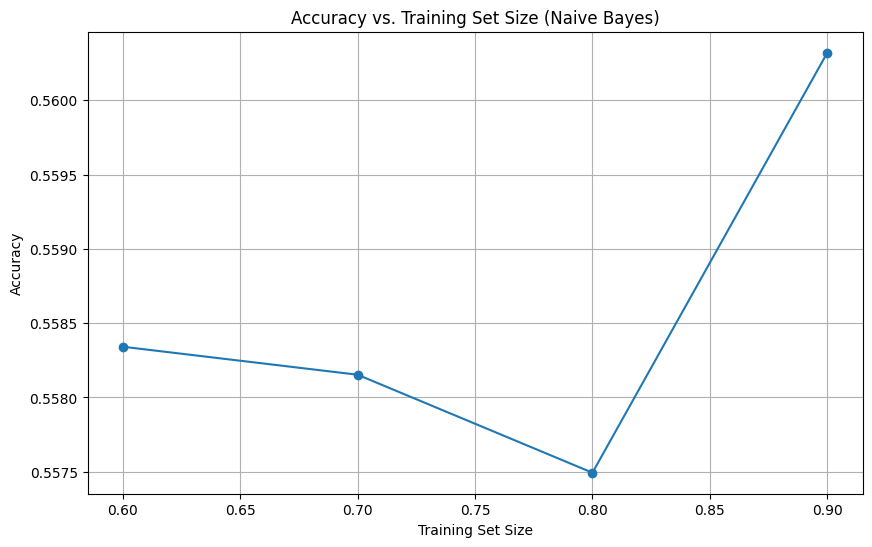

In [ ]:
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

accuracies = []

train_sizes = [0.6, 0.7, 0.8, 0.9]

for train_size in train_sizes:
    X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, train_size=train_size, random_state=42)

    nb_classifier = GaussianNB()
    nb_classifier.fit(X_train_subset, y_train_subset)
    nb_predictions = nb_classifier.predict(X_test)

    nb_accuracy = accuracy_score(y_test, nb_predictions)
    accuracies.append(nb_accuracy)
    nb_classifier = GaussianNB()
    nb_classifier.fit(X_train, y_train)
    nb_predictions = nb_classifier.predict(X_test)
    nb_accuracy = accuracy_score(y_test, nb_predictions)

    print("Naive Bayes Accuracy:", nb_accuracy)
    print(classification_report(y_test, nb_predictions))

# Gráfico de evolução da precisão

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, accuracies, marker='o', linestyle='-')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Training Set Size (Naive Bayes)')
plt.grid(True)
plt.show()


 Possui o objetivo de analisar a precisão de um classificador **Naive Bayes Gaussiano** (GaussianNB) é influenciada pelo tamanho do conjunto de treinamento. Isso ajuda a compreender como a capacidade de generalização do modelo varia com diferentes tamanhos de conjuntos de treinamento.

### **K-Nearest Neighbors (KNN)**

K-Nearest Neighbors Accuracy: 0.5613870665417057
              precision    recall  f1-score   support

        Good       0.45      0.39      0.42       207
        Poor       0.53      0.58      0.55       303
    Standard       0.62      0.62      0.62       557

    accuracy                           0.56      1067
   macro avg       0.53      0.53      0.53      1067
weighted avg       0.56      0.56      0.56      1067

K-Nearest Neighbors Accuracy: 0.5032802249297095
              precision    recall  f1-score   support

        Good       0.37      0.55      0.44       207
        Poor       0.48      0.70      0.57       303
    Standard       0.66      0.38      0.48       557

    accuracy                           0.50      1067
   macro avg       0.50      0.54      0.50      1067
weighted avg       0.55      0.50      0.50      1067

K-Nearest Neighbors Accuracy: 0.5388940955951266
              precision    recall  f1-score   support

        Good       0.37      0.43   

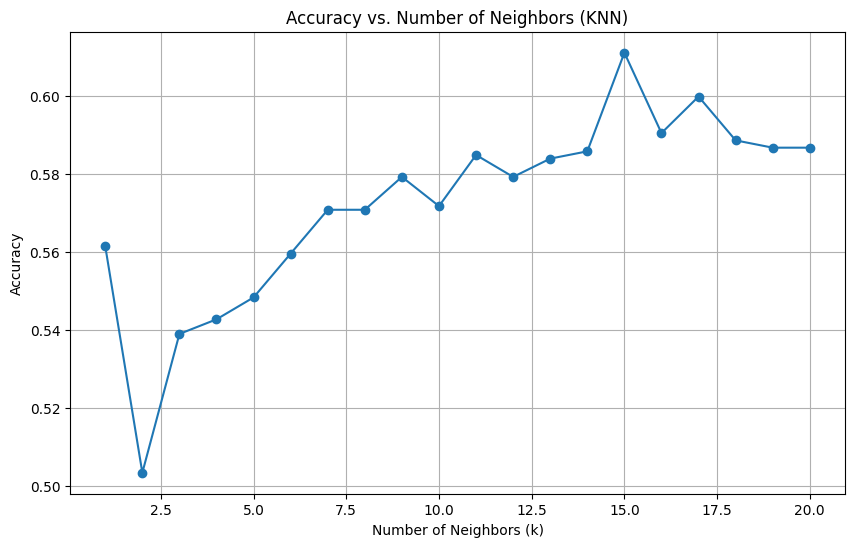

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

accuracies = []
k_values = range(1, 21)

for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)

    knn_predictions = knn_classifier.predict(X_test)
    knn_accuracy = accuracy_score(y_test, knn_predictions)
    accuracies.append(knn_accuracy)

    print("K-Nearest Neighbors Accuracy:", knn_accuracy)
    print(classification_report(y_test, knn_predictions))

# Gráfico de evolução da precisão

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Neighbors (KNN)')
plt.grid(True)
plt.show()


Com o objetivo de analisar a precisão de um classificador K-Vizinhos mais Próximos (KNN) é influenciada pela variação do número de vizinhos (hiperparâmetro k) em um intervalo específico. Isso ajuda a determinar qual valor de k proporciona o melhor desempenho do modelo KNN.

### **Support Vector Machine (SVM)**

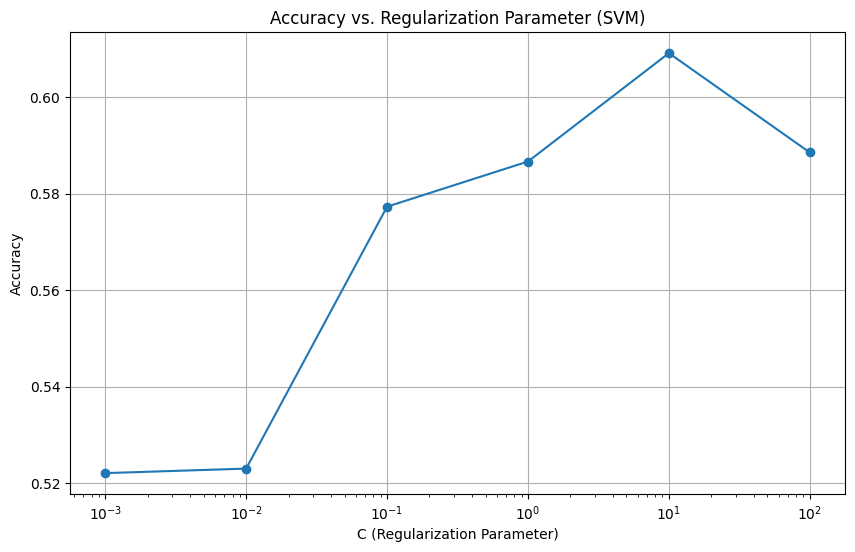

In [ ]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

accuracies = []

C_values = [0.001, 0.01, 0.1, 1, 10, 100]

for C in C_values:
    svm_classifier = SVC(C=C, random_state=42)
    svm_classifier.fit(X_train, y_train)
    svm_predictions = svm_classifier.predict(X_test)
    svm_accuracy = accuracy_score(y_test, svm_predictions)

    accuracies.append(svm_accuracy)

# Gráfico de evolução da precisão
plt.figure(figsize=(10, 6))
plt.semilogx(C_values, accuracies, marker='o', linestyle='-')
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Regularization Parameter (SVM)')
plt.grid(True)
plt.show()


Analisar a precisão de um classificador **Support Vector Machine (SVM)** onde é influenciada pela variação do hiperparâmetro de regularização C no conjunto específico de valores. O objetivo é entender como a escolha do parâmetro de regularização C afeta a precisão do modelo SVM e identificar o valor de C que resulta no melhor desempenho.

### **Regressão Logistica X Naive Bayes**

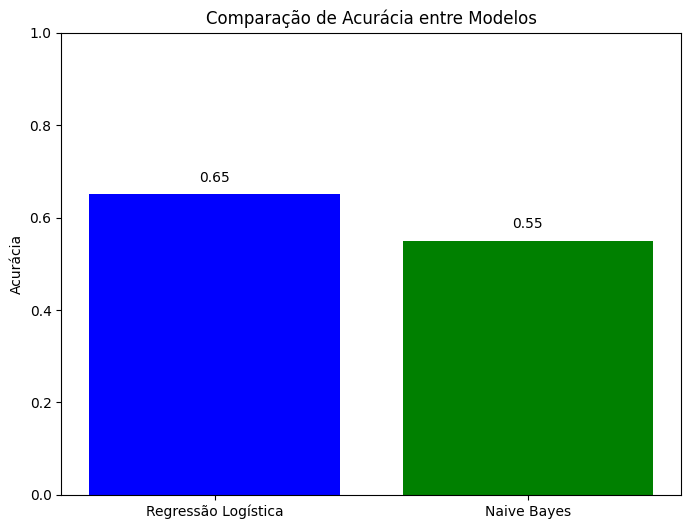

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

np.random.seed(42)
X = np.random.randn(100, 2)
y = np.random.randint(0, 2, 100)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

logistic_reg = LogisticRegression(random_state=42)
logistic_reg.fit(X_train, y_train)

logistic_predictions = logistic_reg.predict(X_test)

logistic_accuracy = accuracy_score(y_test, logistic_predictions)

naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

naive_bayes_predictions = naive_bayes.predict(X_test)

naive_bayes_accuracy = accuracy_score(y_test, naive_bayes_predictions)

models = ['Regressão Logística', 'Naive Bayes']
accuracies = [logistic_accuracy, naive_bayes_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green'])
plt.ylabel('Acurácia')
plt.title('Comparação de Acurácia entre Modelos')
plt.ylim(0, 1)

for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, str(round(v, 2)), ha='center', va='bottom')

plt.show()


Possui o objetivo de comparar o desempenho de dois modelos de aprendizado de máquina, **Regressão Logística** e **Naive Bayes** (GaussianNB). O código realiza essa comparação e apresenta as diferenças de desempenho por meio de um gráfico de barras, utilizando a acurácia como métrica de avaliação.

## **Conclusão**

Referente aos dados do arquivo (train.csv), com execução dos códigos para fornecer a introdução ao fluxo de trabalho típico de machine learning, desde a preparação dos dados até a avaliação de modelos.

Os dados podem servir como base para construir e testar modelos mais sofisticados em projetos de machine learning com conjuntos de dados reais.

# **2 -	Criar um sistema especialista ou Usar um algoritmo não supervisionado na base e falar da experiencia.**

### **Valores problemáticos da coluna (Age)**

In [ ]:
problematic_values = data['Age'][pd.to_numeric(data['Age'], errors='coerce').isna()].unique()
print("Problematic Values in 'Age' column:", problematic_values)


Problematic Values in 'Age' column: ['28_' '24_' '33_' '35_' '30_' '54_' '21_' '37_' '18_' '2111_' '46_' '16_'
 '25_' '38_' '27_' '19_' '55_' '31_' '43_' '48_' '34_' '22_' '20_' '15_'
 '51_' '26_' '40_' '50_' '14_' '39_' '36_' '53_' '44_' '45_' '42_' '32_'
 '23_' '41_' '29_' '52_' '17_' '49_' '5769_' '4383_' '56_' '2650_' '3307_'
 '6556_']


Identificar e imprimir os valores problemáticos na coluna 'Age' do conjunto de dados.

### **Tratando Valores Não Numéricos na Coluna (Age)**

In [ ]:
data = data[pd.to_numeric(data['Age'], errors='coerce').notna()]


Analisar e filtrar o conjunto de dados para manter apenas as linhas em que a coluna 'Age' contém valores numéricos válidos, descartando as linhas em que a conversão para numérico resultaria em NaN (Not-a-Number).

In [ ]:
non_numeric_columns = data.select_dtypes(exclude=[np.number]).columns

for column in non_numeric_columns:
    problematic_values = data[column][pd.to_numeric(data[column], errors='coerce').isna()].unique()
    print(f"Problematic Values in '{column}' column:", problematic_values)



Problematic Values in 'Customer_ID' column: ['CUS_0xd40' 'CUS_0x21b1' 'CUS_0x2dbc' ... 'CUS_0x97b' 'CUS_0x765b'
 'CUS_0x6f4d']
Problematic Values in 'Month' column: ['January' 'July' 'February' 'March' 'May' 'June' 'August' 'April']
Problematic Values in 'Name' column: ['Aaron Maashoh' 'Rick Rothackerj' 'Langep' ... 'Lawdero' 'Jane Leeb'
 'Luke Bakerg']
Problematic Values in 'SSN' column: ['821-00-0265' '004-07-5839' '486-85-3974' ... '578-67-3819' '948-33-7459'
 '499-40-6829']
Problematic Values in 'Occupation' column: ['Scientist' 'Teacher' '_______' 'Engineer' 'Entrepreneur' 'Lawyer'
 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Mechanic' 'Writer'
 'Accountant' 'Architect' 'Musician' 'Developer']
Problematic Values in 'Num_of_Loan' column: ['3_' '5_' '2_' '4_' '7_' '1_' '8_' '6_' '9_' '597_' '92_']
Problematic Values in 'Type_of_Loan' column: ['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan'
 'Credit-Builder Loan' 'Auto Loan, Auto Loan, and Not Specified'
 '

### **Remoção de Linhas com Valores Ausentes ou Não Numéricos**

In [ ]:
data = data.dropna(subset=non_numeric_columns)


Possui o objetivo de exclui todas as entradas que possuem valores não numéricos ou ausentes em colunas não numéricas.

### **Analise de valores problemáticos em colunas não numéricas**

In [ ]:
relevant_columns = ['Age', 'Annual_Income']
non_numeric_columns = data[relevant_columns].select_dtypes(exclude=[np.number]).columns

for column in non_numeric_columns:
    problematic_values = data[column][pd.to_numeric(data[column], errors='coerce').isna()].unique()
    print(f"Problematic Values in '{column}' column:", problematic_values)



Problematic Values in 'Age' column: []
Problematic Values in 'Annual_Income' column: ['34847.84_' '30689.89_' '10183.015_' '12600.445_' '34290.12_' '43070.24_'
 '6515990.0_' '39641.54_' '148699.32_' '14165.23_' '78988.48_' '41746.76_'
 '73737.36_' '75273.24_' '54820.89_' '58674.66_' '30390.44_' '72330.98_'
 '43241.49_' '17787.34_' '66105.4_' '14205.09_' '144881.68_' '56803.71_'
 '8908998.0_' '15015.4_' '19777.05_' '30536.62_' '19795.52_' '18717.02_'
 '27796.42_' '41735.55_' '40391.66_' '7441.295_' '16578.115_' '35376.32_'
 '70112.78_' '68935.26_' '10025.2_' '28230.92_' '10623.765_' '83703.52_'
 '51824.94_' '11431.775_' '142170.12_' '30972.54_' '173196.32_'
 '46113.81_' '74733.44_' '20540.49_' '33200.52_' '65778.22_' '12016.0_'
 '63197.26_' '72241.02_' '125508.36_' '20742.46_' '55558.71_' '33447.42_'
 '15713.83_' '18744.4_' '12070.845_' '38539.57_' '48411.24_' '33314.96_'
 '62316.63_' '73434.92_' '15735.68_' '55662.64_' '162550.32_' '14884.465_'
 '31732.61_' '9349.475_' '66169.56_' '168

Identificar e imprimir os valores problemáticos nas colunas que não são do tipo numérico no conjunto de dados.

### **Padronização de Colunas selecionadas para Valores Numéricos Válidos**

In [ ]:
data[relevant_columns] = data[relevant_columns].apply(pd.to_numeric, errors='coerce').fillna(0)

Com o objetico de converter e padronizar as colunas selecionadas com conjunto de dados, transformando todas as entradas em números e preenchendo quaisquer valores não numéricos com 0.

Assim podendo garantir que as colunas relevantes obtenham somente valores numéricos válidos.

### **Limpeza e Análise de PCA de dados com visualização**

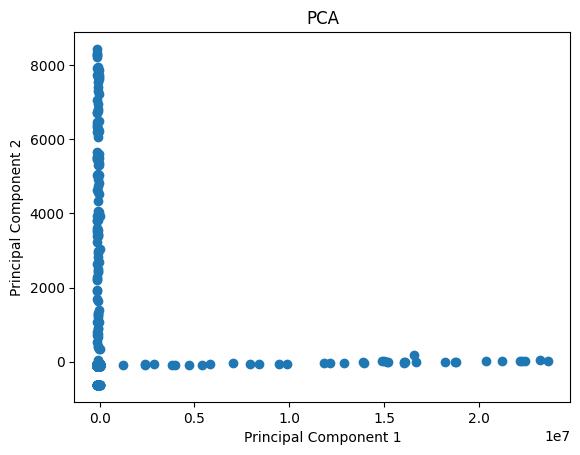

Explained Variance Ratio:
[9.99999654e-01 3.45620340e-07]


In [ ]:
data = data[pd.to_numeric(data['Age'], errors='coerce').notna()]
data = data[pd.to_numeric(data['Annual_Income'], errors='coerce').notna()]

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X = data[['Age', 'Annual_Income']]
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA')
plt.show()

explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:")
print(explained_variance)

Possui o objetivo de realizar a limpeza dos dados, eliminando as linhas com valores não numéricos em colunas específicas, com uma análise de Componentes Principais (PCA) nas colunas para redução de dimensionalidade e finalmente obtendo a visualização dos resultados dessa redução.

Assim auxilia na compreensão de como as colunas 'Age' e 'Annual_Income' contribuem para a variação nos dados.

## **Conclusão**

Após a limpeza dos dados problemáticos, utilizamos a análise de componentes principais (PCA) para visualizar como as variáveis `Age' e 'Annual_Income' estão relacionadas em um espaço bidimensional. Ao medir a importância dos componentes principais, foi determinada a contribuição relativa de cada variável para a variabilidade dos dados.

A limpeza de dados e a análise de PCA são etapas valiosas na preparação dos dados para análise posterior, fornecendo informações sobre a estrutura e a importância das variáveis envolvidas. Essa abordagem o ajudará a tomar decisões sobre as análises subsequentes.